+ 练习6只是让会用 SVM 了，但是对帮助理解 SVM 没有多大用。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.svm
import scipy.io as scio
import pandas as pd

# 1 Support Vector Machines

## 1.1 Example Dataset 1

In [2]:
fpath = 'data/ex6data1.mat'
def loadData(fpath):
    data = scio.loadmat(fpath)
    x,y = data['X'],data['y']
    return x,y
x,y = loadData(fpath)
x.shape,y.shape

((51, 2), (51, 1))

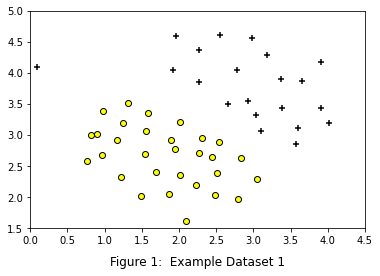

In [3]:
def draw_Figure1(x,y,title='Figure 1:  Example Dataset 1',isShow=True,xlim=(0,4.5),ylim=(1.5,5)):
    m = x.shape[0]
    plt.xlim(xlim)
    plt.ylim(ylim)
    for i in range(m):
        if y[i] == 1: plt.scatter(x[i][0],x[i][1],marker='+',c='black')
        else: plt.scatter(x[i][0],x[i][1],marker='o',c='yellow',edgecolors='black')
    plt.title(title,y=-0.2)
    if isShow:
        plt.show()
draw_Figure1(x,y,isShow=False)

先用 sklearn 包中的 svm 画出来

In [4]:
svc1 = sklearn.svm.LinearSVC(C=1,loss='hinge',max_iter=3000)
svc1.fit(x,y.ravel())
svc1.score(x,y)

0.9803921568627451

参考：[decision_function(x) 函数返回结果的含义](https://blog.csdn.net/cxx654/article/details/106727812)

In [5]:
svc1.decision_function(x)

array([ 0.80282806,  0.38391775,  1.3774948 ,  0.52118324,  0.33343219,
        0.868729  ,  0.68654209,  1.61122581,  0.83449014,  1.1671327 ,
        1.07325399,  0.22982785,  0.33182606,  0.7958088 ,  0.31580988,
        1.27410063,  1.21021109,  1.        ,  0.5647715 ,  0.38991225,
       -0.43522171, -0.30878844, -0.68619504, -0.55394975, -0.33244067,
       -0.29375932, -0.44061342, -0.98390379, -0.68555057, -1.328407  ,
       -1.00372028, -1.49225398, -0.61136   , -0.68339411, -0.99998278,
       -1.15268036, -1.57834929, -1.35594136, -1.03235486, -1.18500834,
       -0.77137887, -0.7668836 , -0.46646212, -0.99991359, -0.51025824,
       -0.85854305, -1.55894445, -0.25481734, -1.11361245, -1.54715476,
       -0.70994484])

作业中时直接将决策边界画出来了，但是 svc1.decision_function(x) 和参考答案都没有直观的给出决策边界，所以只能通过老办法等高线来手动画决策边界了。

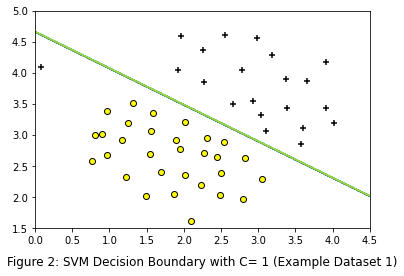

In [6]:
def draw_Figure2(x,y,C=1,title='Figure 2: SVM Decision Boundary with C= 1 (Example Dataset 1)',max_iter=1000,num=500):
    svc = sklearn.svm.LinearSVC(C=C,max_iter=max_iter)
    svc.fit(x,y.ravel())
    xlim = [0,4.5]
    ylim = [1.5,5]
    draw_Figure1(x,y,title=title,isShow=False,xlim=xlim,ylim=ylim)

#     X0,X1 = np.meshgrid(np.linspace(x[:,0].min(),x[:,0].max(),num=num),np.linspace(x[:,1].min(),x[:,1].max(),num=num)) # 生成网格矩阵,这个效果不太好
    X0,X1 = np.meshgrid(np.linspace(xlim[0],xlim[1],num=num),np.linspace(ylim[0],ylim[1],num=num)) # 生成网格矩阵
    Y = svc.predict(np.c_[X0.ravel(), X1.ravel()])
    plt.contour(X0, X1, Y.reshape(X0.shape))
    plt.show()
draw_Figure2(x,y,C=1)

C 的值过大  -> λ 的值过小  =》 过拟合现象

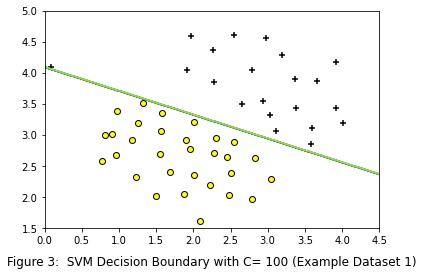

In [7]:
def draw_Figure3(x,y,C=100,title='Figure 3:  SVM Decision Boundary with C= 100 (Example Dataset 1)',max_iter=200000,num=500):
    draw_Figure2(x,y,C,title,max_iter=max_iter,num=num)
draw_Figure3(x,y)

## 1.2 SVM with Gaussian Kernels

### 1.2.1 Gaussian Kernel

In [8]:
def gaussianKernel(x0,x1,sigma=1): 
    x0,x1 = x0.reshape(-1,),x1.reshape(-1,) # x0,x1 为列向量，而不是列矩阵！！ 
    return np.exp(-(x0-x1).T.dot(x0-x1)/(2*(sigma ** 2))) # 只有时列向量才返回数，列矩阵的话返回的还是矩阵

高斯核函数的测试

In [9]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussianKernel(x1, x2, sigma)

0.32465246735834974

虽然实现了高斯核函数，但是下面却不会用这个自己实现的，sklearn.svm 模块中已经内嵌了高斯核函数

## 1.2.2 Example Dataset 2

In [10]:
fpath2 = 'data/ex6data2.mat'
x2,y2 = loadData(fpath2)
x2.shape,y2.shape

((863, 2), (863, 1))

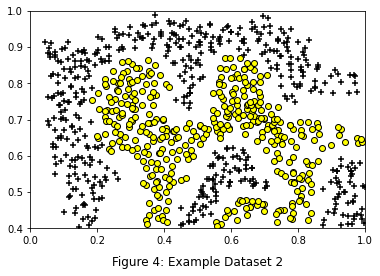

In [11]:
def draw_Figure4(x,y,title='Figure 4: Example Dataset 2',xlim=(0,1),ylim=(0.4,1),isShow=True):
    draw_Figure1(x,y,isShow=isShow,title=title,xlim=xlim,ylim=ylim)
draw_Figure4(x2,y2)

In [12]:
svc = sklearn.svm.SVC(C=100, kernel='rbf', gamma=10, probability=True)
svc

SVC(C=100, gamma=10, probability=True)

In [13]:
svc.fit(x2,y2.ravel())
svc.score(x2,y2)

0.9698725376593279

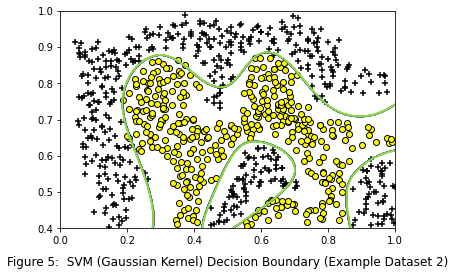

In [14]:
def draw_Figure5(x,y,C=100,title='Figure 5:  SVM (Gaussian Kernel) Decision Boundary (Example Dataset 2)',num=500):
    svc = sklearn.svm.SVC(C=C, kernel='rbf', gamma=10, probability=True)
    svc.fit(x,y.ravel())
    xlim=(0,1)
    ylim=(0.4,1)
    draw_Figure4(x,y,title=title,isShow=False,xlim=xlim,ylim=ylim)

    X0,X1 = np.meshgrid(np.linspace(xlim[0],xlim[1],num=num),np.linspace(ylim[0],ylim[1],num=num)) # 生成网格矩阵
    Y = svc.predict(np.c_[X0.ravel(), X1.ravel()])
    plt.contour(X0, X1, Y.reshape(X0.shape))
    plt.show()
draw_Figure5(x2,y2)

### 1.2.3 Example Dataset 3

In [15]:
fpath3 = 'data/ex6data3.mat'
def loadData2(fpath):
    data = scio.loadmat(fpath3)
    return data['X'],data['y'],data['Xval'],data['yval']
x3,y3,x3val,y3val = loadData2(fpath)
x.shape,y.shape,x3val.shape,y3val.shape

((51, 2), (51, 1), (200, 2), (200, 1))

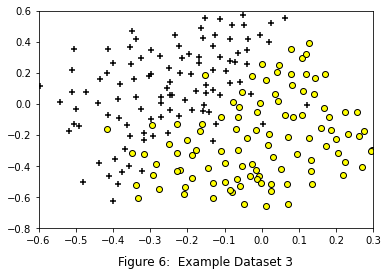

In [16]:
def draw_Figure6(x,y,title='Figure 6:  Example Dataset 3',xlim=(-0.6,0.3),ylim=(-0.8,0.6),isShow=True):
    draw_Figure1(x,y,title=title,xlim=xlim,ylim=ylim,isShow=isShow)
draw_Figure6(x3,y3)

In [17]:
steps = [0.01,0.03,0.1,0.3,1,3,10,30,100]
def bestParam(x,y,xval,yval,steps):
    best_C,best_gamma,max_score = 0,0,0
    for C in steps:
        for gamma in steps:
            svc3 = sklearn.svm.SVC(C=C, kernel='rbf', gamma=gamma, probability=True)
            svc3.fit(x3,y3.ravel())
            score = svc3.score(xval,yval)
            if score > max_score : 
                best_C = C
                best_gamma = gamma
                max_score = score
#             print('when C = '+str(C)+",gamma = "+str(gamma)+' : cross validation set score: '+str(score),sep='\n')
    print('max_score:'+str(max_score))
    return best_C,best_gamma,max_score
C,gamma,_ = bestParam(x3,y3,x3val,y3val,steps)
C,gamma

max_score:0.965


(0.3, 100)

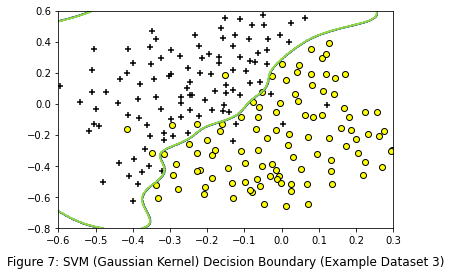

In [18]:
def draw_Figure7(x,y,C=100,title='Figure 5: SVM (Gaussian Kernel) Decision Boundary (Example Dataset 2)',num=500,gamma=gamma):
    svc = sklearn.svm.SVC(C=C, kernel='rbf', gamma=gamma, probability=True)
    svc.fit(x,y.ravel())
    xlim=(-0.6,0.3)
    ylim=(-0.8,0.6)
    draw_Figure4(x,y,title=title,isShow=False,xlim=xlim,ylim=ylim)

    X0,X1 = np.meshgrid(np.linspace(xlim[0],xlim[1],num=num),np.linspace(ylim[0],ylim[1],num=num)) # 生成网格矩阵
    Y = svc.predict(np.c_[X0.ravel(), X1.ravel()])
    plt.contour(X0, X1, Y.reshape(X0.shape))
    plt.show()
draw_Figure7(x3,y3,C=C,title='Figure 7: SVM (Gaussian Kernel) Decision Boundary (Example Dataset 3)',num=500,gamma=gamma)

**???? 出大问题了**，视频上和笔记上都说 C太大导致过拟合，C太小导致欠拟合问题，这个说法没问题，更改上面的C的值也确实如此

**可是后面说 gamma 太大导致高偏差低方差（欠拟合），gamma太小导致低偏差高方差（过拟合）。但我得出的结论正好与之相反**

**更新：**

查了一些资料，其实没问题，sklearn的svm底层实现是 [LIBSVM](https://www.csie.ntu.edu.tw/~cjlin/libsvm/)，而在 LIBSVM 中实现核函数是另 gamma=1/(2\*sigma^2)，所以才会出现这种正好相反的结论

# 2 Spam Classification

## 2.1 Preprocessing Emails

## 2.2 Extracting Features from Emails

2.1 和 2.2 都是用来预处理化邮件的，这部分不是机器学习相关的内容，这里跳过。

预处理化之后的数据在 data/spamTrain.mat 和 data/spamTest.mat 中

## 2.3 Training SVM for Spam Classification

In [19]:
def loadData3(trainPath,testPath):
    trainSet = scio.loadmat(trainPath)
    testSet = scio.loadmat(testPath)
    trainX,trainY = trainSet['X'],trainSet['y']
    testX,testY = testSet['Xtest'],testSet['ytest']
    return trainX,trainY,testX,testY
trainX,trainY,testX,testY = loadData3('data/spamTrain.mat','data/spamTest.mat')
trainX.shape,trainY.shape,testX.shape,testY.shape

((4000, 1899), (4000, 1), (1000, 1899), (1000, 1))

In [20]:
svc2 = sklearn.svm.SVC() 
svc2.fit(trainX,trainY.ravel())

SVC()

In [21]:
print('training accuracy: '+str(svc2.score(trainX,trainY.ravel()))+'\ntest accuracy: '+str(svc2.score(testX,testY.ravel())))

training accuracy: 0.99325
test accuracy: 0.987


## 2.4 Top Predictors for Spam

## 2.5 Optional (ungraded) exercise: Try your own emails

## 2.6 Optional (ungraded) exercise: Build your own dataset

2.4,2.5 以及 2.6 都需要先实现2.1 和 2.2 的预处理模块。

同样这三小节对机器学习以及帮助理解 SVM 有限，跳过。

(PS：其实是我懒不想写这部分了并且帮助没那么大。。。)

# END